## Weddell Sea surface freshwater budget

In [18]:
import xarray as xr
import numpy as np
import gsw
import cmocean
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import glob
import sys
sys.path.append('/home/users/birgal/')
from nemo_python_git.plots import plot_ts_distribution

In [19]:
base_dir = '/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/'
nemo_mesh= f'{base_dir}bathymetry/mesh_mask-20240305.nc'
run_dir  = f'{base_dir}output/ERA5_test7/'

In [22]:
gridT_files = np.sort(glob.glob(f'{run_dir}files/*grid_T*'))
gridU_files = np.sort(glob.glob(f'{run_dir}files/*grid_U*'))
gridV_files = np.sort(glob.glob(f'{run_dir}files/*grid_V*'))
SBC_files   = np.sort(glob.glob(f'{run_dir}files/*SBC*'))
ice_files   = np.sort(glob.glob(f'{run_dir}files/*icemod*'))

ds_mesh = xr.open_dataset(nemo_mesh)
ds_gridT= xr.open_dataset(gridT_files[0])
ds_gridU= xr.open_dataset(gridU_files[0])
ds_gridV= xr.open_dataset(gridV_files[0])
ds_SBC  = xr.open_dataset(SBC_files[0]).rename({'x_grid_T':'x','y_grid_T':'y'})
ds_ice  = xr.open_dataset(ice_files[0])

Components to account for:
- evaporation (wfo?, kg/m2/s from both sea ice and ocean water)
- precipitation (snowfall snowpre, kg/m2/s, total precipitation precip)
- ~~runoff (runoffs, kg/m2/s)~~
- sea ice melt/formation (vfxice kg/m2/s, ice-ocean mass flux from ice melt/growth (neg = growth), sfxice, ice-ocean salt flux from ice growth/melt (neg = growth))
- iceberg melt (iceberg_cea, kg/m2/s)
- iceshelf freshwater flux (fwfisf, kg/m2/s)
- ~~water_flux_out_of_sea_water_due_to_newtonian_relaxation (erp, kg/m2/s)~~

Boundary transports?

In [4]:
# regions:
weddell_basin      = {'x': slice(950, 1150, None), 'y': slice(295, 360, None)} # very similar to weddell convect but withwout shelf edge
weddell_west_shelf = {'x': slice(918, 967, None), 'y': slice(245, 310, None)}
weddell_overall    = {'x': slice(850, 1200, None), 'y': slice(50, -1, None)}

In [23]:
ds_SBC  = xr.open_mfdataset(np.append(SBC_files[0:19], SBC_files[20:])).rename({'x_grid_T':'x','y_grid_T':'y'})
# ds_ice  = xr.open_mfdataset(np.append(ice_files[0:19], ice_files[20:]))
ds_T    = xr.open_mfdataset(np.append(gridT_files[0:19], gridT_files[20:])).rename({'x_grid_T':'x','y_grid_T':'y'})

In [17]:
ds_SBC.qt_oce

<xarray.DataArray 'qt_oce' (time_counter: 404, y: 453, x: 1440)>
dask.array<concatenate, shape=(404, 453, 1440), dtype=float32, chunksize=(12, 453, 1440), chunktype=numpy.ndarray>
Coordinates:
    nav_lat_grid_T  (y, x) float32 dask.array<chunksize=(453, 1440), meta=np.ndarray>
    nav_lon_grid_T  (y, x) float32 dask.array<chunksize=(453, 1440), meta=np.ndarray>
    time_centered   (time_counter) datetime64[ns] dask.array<chunksize=(12,), meta=np.ndarray>
  * time_counter    (time_counter) datetime64[ns] 1979-01-16T12:00:00 ... 201...
Dimensions without coordinates: y, x
Attributes:
    standard_name:       surface_downward_heat_flux_in_sea_water
    long_name:           total flux at ocean surface
    units:               W/m2
    online_operation:    average
    interval_operation:  1350 s
    interval_write:      1 month
    cell_methods:        time: mean (interval: 1350 s)
    cell_measures:       area: area_grid_T

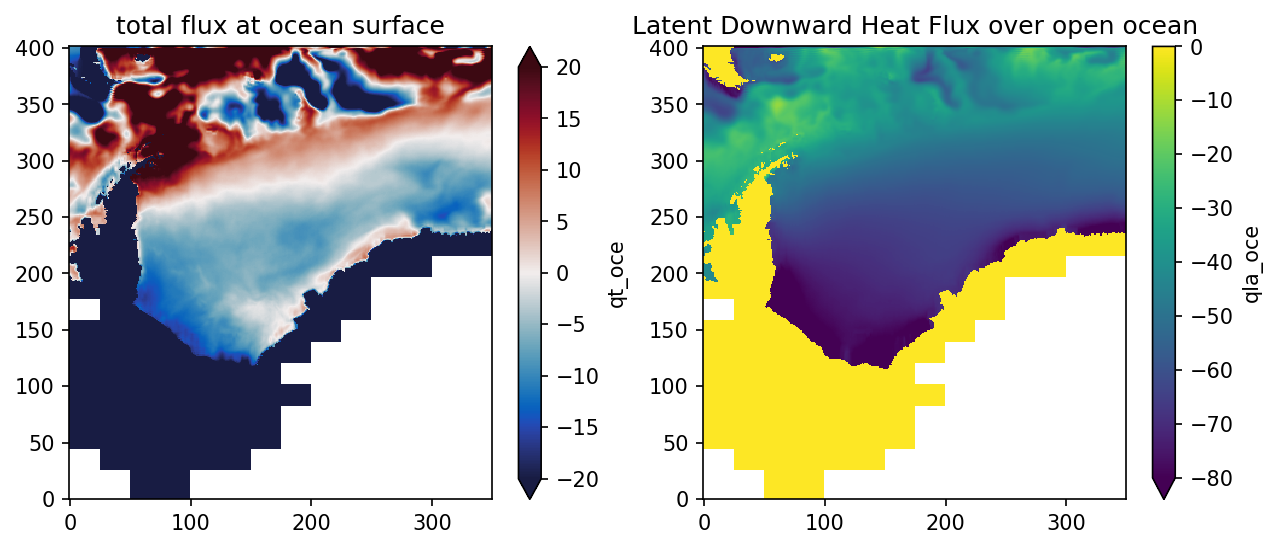

In [16]:
name1 = ds_SBC.qt_oce.long_name
name2 = ds_SBC.qla_oce.long_name

fig, ax = plt.subplots(1,2, figsize=(10,4), dpi=150)
ds_SBC.qt_oce.isel(**weddell_overall).mean(dim='time_counter').plot(ax=ax[0], vmin=-20, vmax=20, cmap=cmocean.cm.balance) 
ds_SBC.qla_oce.isel(**weddell_overall).mean(dim='time_counter').plot(ax=ax[1], vmin=-80, vmax=0)
title1= ax[0].set_title(name1)
title2= ax[1].set_title(name2)

for axis in ax.ravel():
    axis.set_xlabel(''); axis.set_ylabel('');

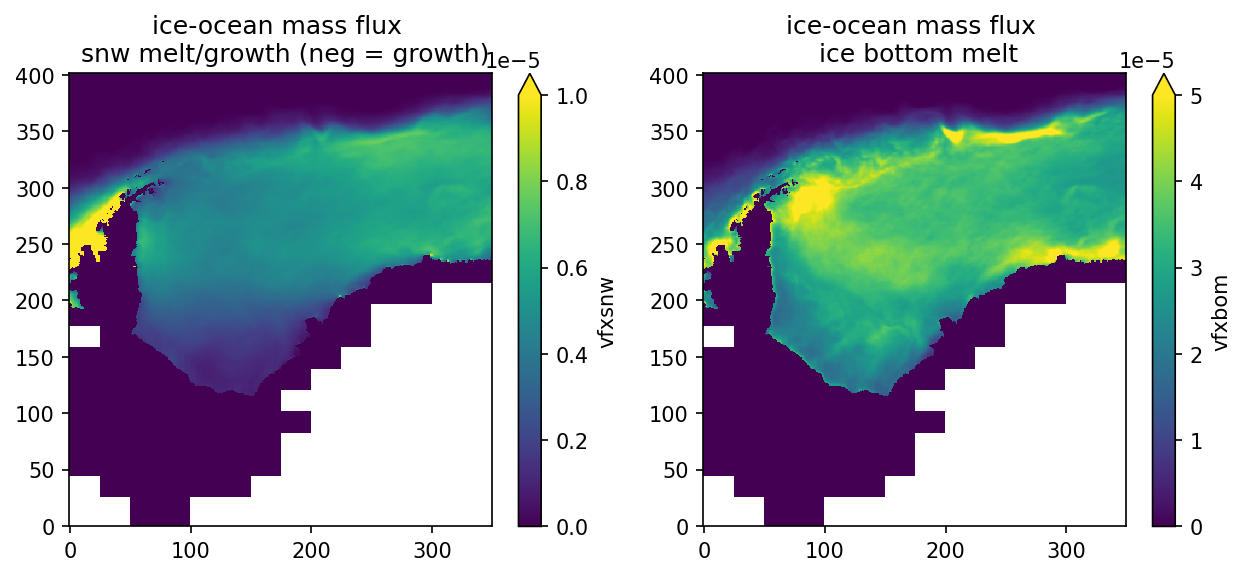

In [9]:
name1 = ds_ice.vfxsnw.long_name
name2 = ds_ice.vfxbom.long_name

fig, ax = plt.subplots(1,2, figsize=(10,4), dpi=150)
ds_ice.vfxsnw.isel(**weddell_overall).mean(dim='time_counter').plot(ax=ax[0], vmin=0, vmax=1e-5) 
ds_ice.vfxbom.isel(**weddell_overall).mean(dim='time_counter').plot(ax=ax[1], vmin=0, vmax=5e-5)
title1= ax[0].set_title(name1.split('from')[0] + '\n' + name1.split('from')[1])
title2= ax[1].set_title(name2.split('from')[0] + '\n' + name2.split('from')[1])

for axis in ax.ravel():
    axis.set_xlabel(''); axis.set_ylabel('');

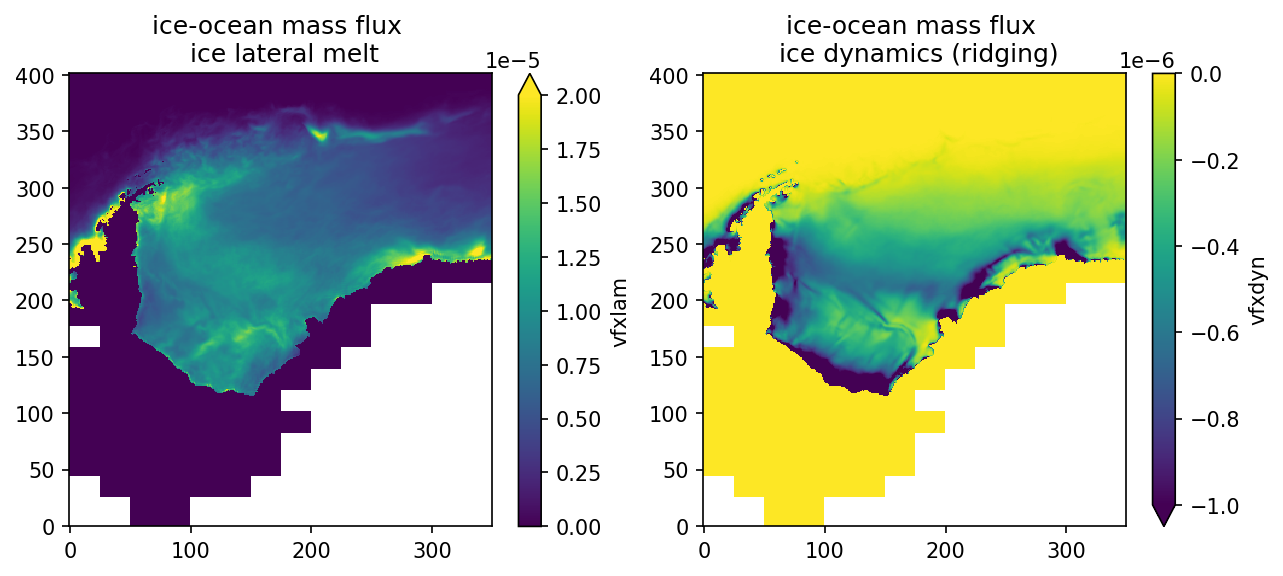

In [12]:
name1 = ds_ice.vfxlam.long_name
name2 = ds_ice.vfxdyn.long_name

fig, ax = plt.subplots(1,2, figsize=(10,4), dpi=150)
ds_ice.vfxlam.isel(**weddell_overall).mean(dim='time_counter').plot(ax=ax[0], vmin=0, vmax=2e-5) 
ds_ice.vfxdyn.isel(**weddell_overall).mean(dim='time_counter').plot(ax=ax[1], vmin=-1e-6, vmax=0)
title1= ax[0].set_title(name1.split('from')[0] + '\n' + name1.split('from')[1])
title2= ax[1].set_title(name2.split('from')[0] + '\n' + name2.split('from')[1])

for axis in ax.ravel():
    axis.set_xlabel(''); axis.set_ylabel('');

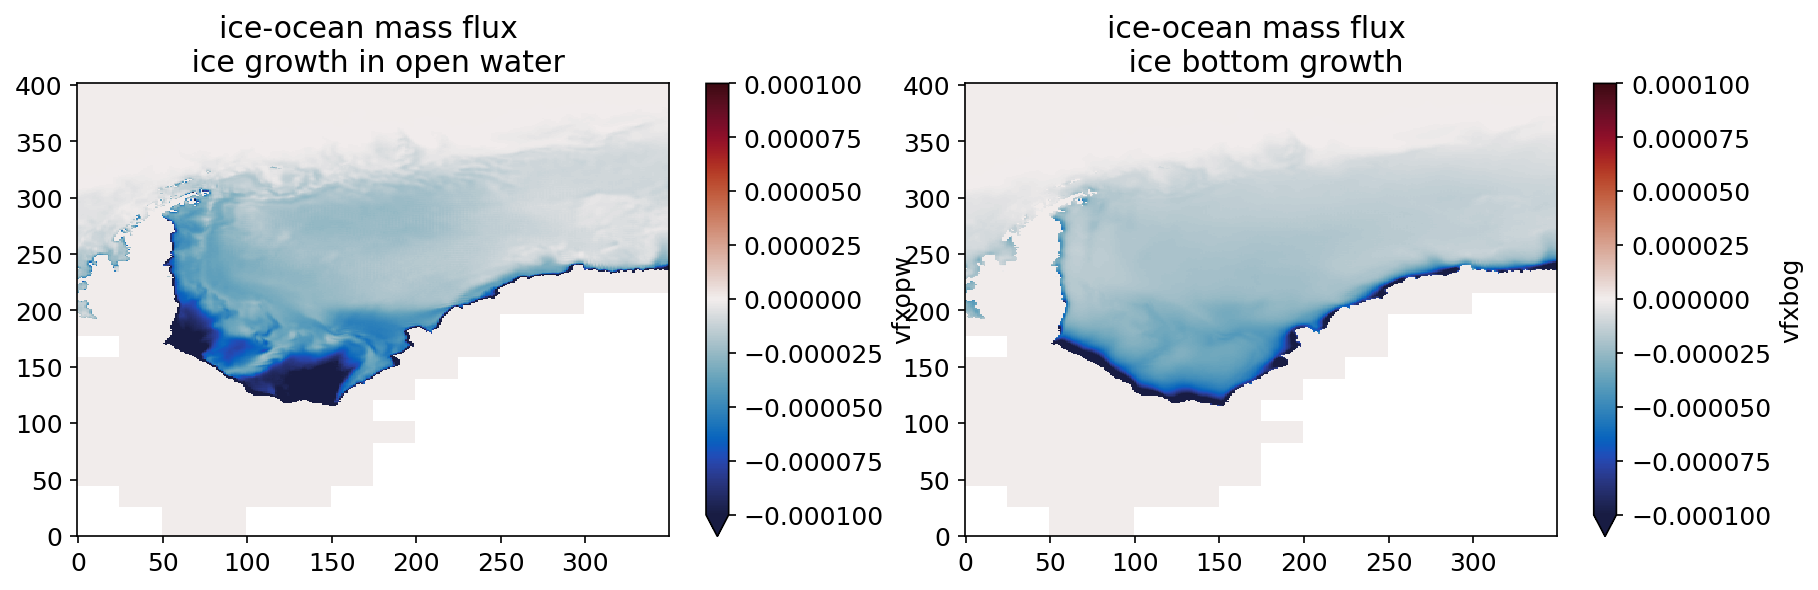

In [93]:
name1 = ds_ice.vfxopw.long_name
name2 = ds_ice.vfxbog.long_name

fig, ax = plt.subplots(1,2, figsize=(14,4), dpi=150)
ds_ice.vfxopw.isel(**weddell_overall).mean(dim='time_counter').plot(ax=ax[0], vmin=-1e-4, vmax=1e-4, cmap=cmocean.cm.balance) # W/m2
ds_ice.vfxbog.isel(**weddell_overall).mean(dim='time_counter').plot(ax=ax[1], vmin=-1e-4, vmax=1e-4, cmap=cmocean.cm.balance)
title1= ax[0].set_title(name1.split('from')[0] + '\n' + name1.split('from')[1])
title2= ax[1].set_title(name2.split('from')[0] + '\n' + name2.split('from')[1])

for axis in ax.ravel():
    axis.set_xlabel(''); axis.set_ylabel('');

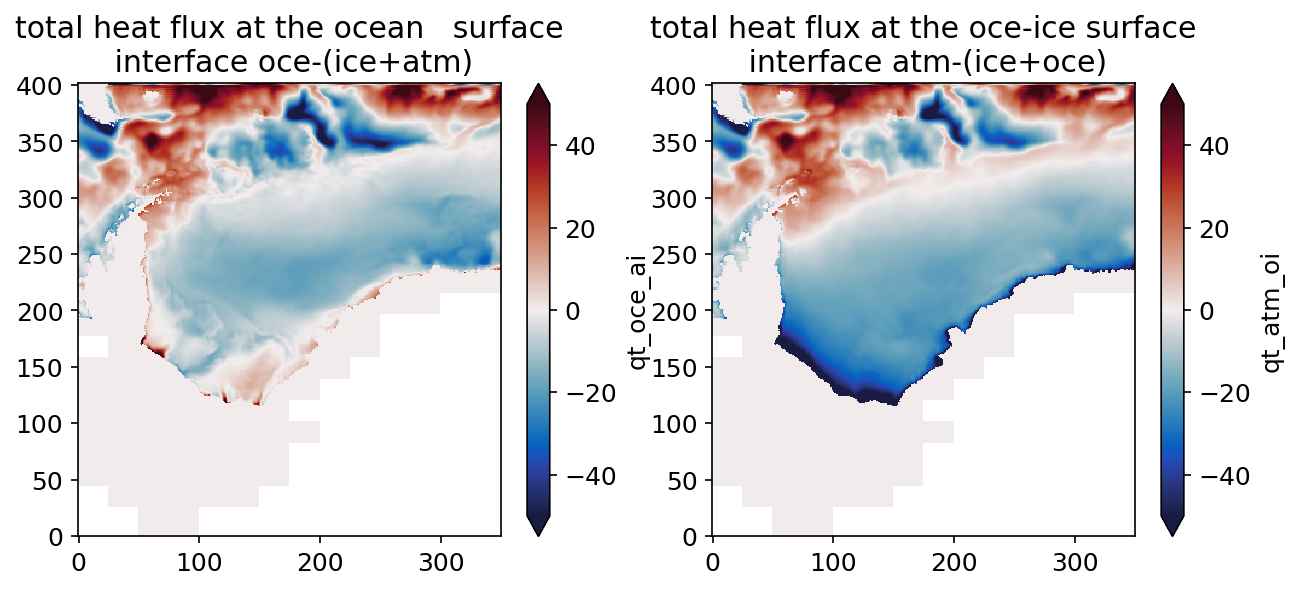

In [88]:
name1 = ds_ice.qt_oce_ai.long_name
name2 = ds_ice.qt_atm_oi.long_name

fig, ax = plt.subplots(1,2, figsize=(10,4), dpi=150)
ds_ice.qt_oce_ai.isel(**weddell_overall).mean(dim='time_counter').plot(ax=ax[0], vmin=-50, vmax=50, cmap=cmocean.cm.balance) # W/m2
ds_ice.qt_atm_oi.isel(**weddell_overall).mean(dim='time_counter').plot(ax=ax[1], vmin=-50, vmax=50, cmap=cmocean.cm.balance)
title1= ax[0].set_title(name1.split(':')[0] + '\n' + name1.split(':')[1])
title2= ax[1].set_title(name2.split(':')[0] + '\n' + name2.split(':')[1])

for axis in ax.ravel():
    axis.set_xlabel(''); axis.set_ylabel('');

In [26]:
water_flux_into_ocean = ds_SBC['precip'].isel(**weddell_overall) +  \
                        ds_SBC['runoffs'].isel(**weddell_overall) + ds_SBC['berg_melt'].isel(**weddell_overall) + \
                        ds_SBC['fwfisf'].isel(**weddell_overall) + ds_ice['vfxice'].isel(**weddell_overall)
# (-1*ds_SBC['wfo'].isel(**weddell_overall)) + 

# wfo seems to include vfxice already

water_flux_into_ocean = xr.where(water_flux_into_ocean==0, np.nan, water_flux_into_ocean)
# convert from kg/m2/s * m3/kg = m/s * s/yr --> m/yr
# 1 kg/m2/s * 1e-3 m3/kg = m/s * s/year = m / yr
sec_per_year = 3600*24*365
water_flux_into_ocean = water_flux_into_ocean.sum(dim='time_counter') * 1e-3 *sec_per_year / ds_SBC.time_counter.size

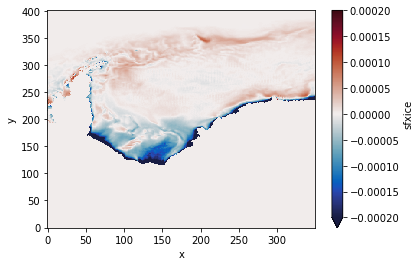

In [136]:
ds_ice['sfxice'].isel(**weddell_overall).sum(dim='time_counter').plot(vmin=-2e-4, vmax=2e-4, cmap=cmocean.cm.balance)

Problems do seem to originate from regions with strong sea ice formation. Double-check the growth rates and whether those are vaguely reasonable.

In [24]:
wfo      = -1*(ds_SBC['wfo'].isel(**weddell_overall).sum(dim='time_counter')* 1e-3 *sec_per_year) / ds_SBC.time_counter.size
vfxice   = (ds_ice['vfxice'].isel(**weddell_overall).sum(dim='time_counter')* 1e-3 *sec_per_year) / ds_SBC.time_counter.size
precip   = (ds_SBC['precip'].isel(**weddell_overall).sum(dim='time_counter')* 1e-3 *sec_per_year) / ds_SBC.time_counter.size
bergmelt = (ds_SBC['berg_melt'].isel(**weddell_overall).sum(dim='time_counter')* 1e-3 *sec_per_year) / ds_SBC.time_counter.size
fwfisf   = (ds_SBC['fwfisf'].isel(**weddell_overall).sum(dim='time_counter')* 1e-3 *sec_per_year) / ds_SBC.time_counter.size

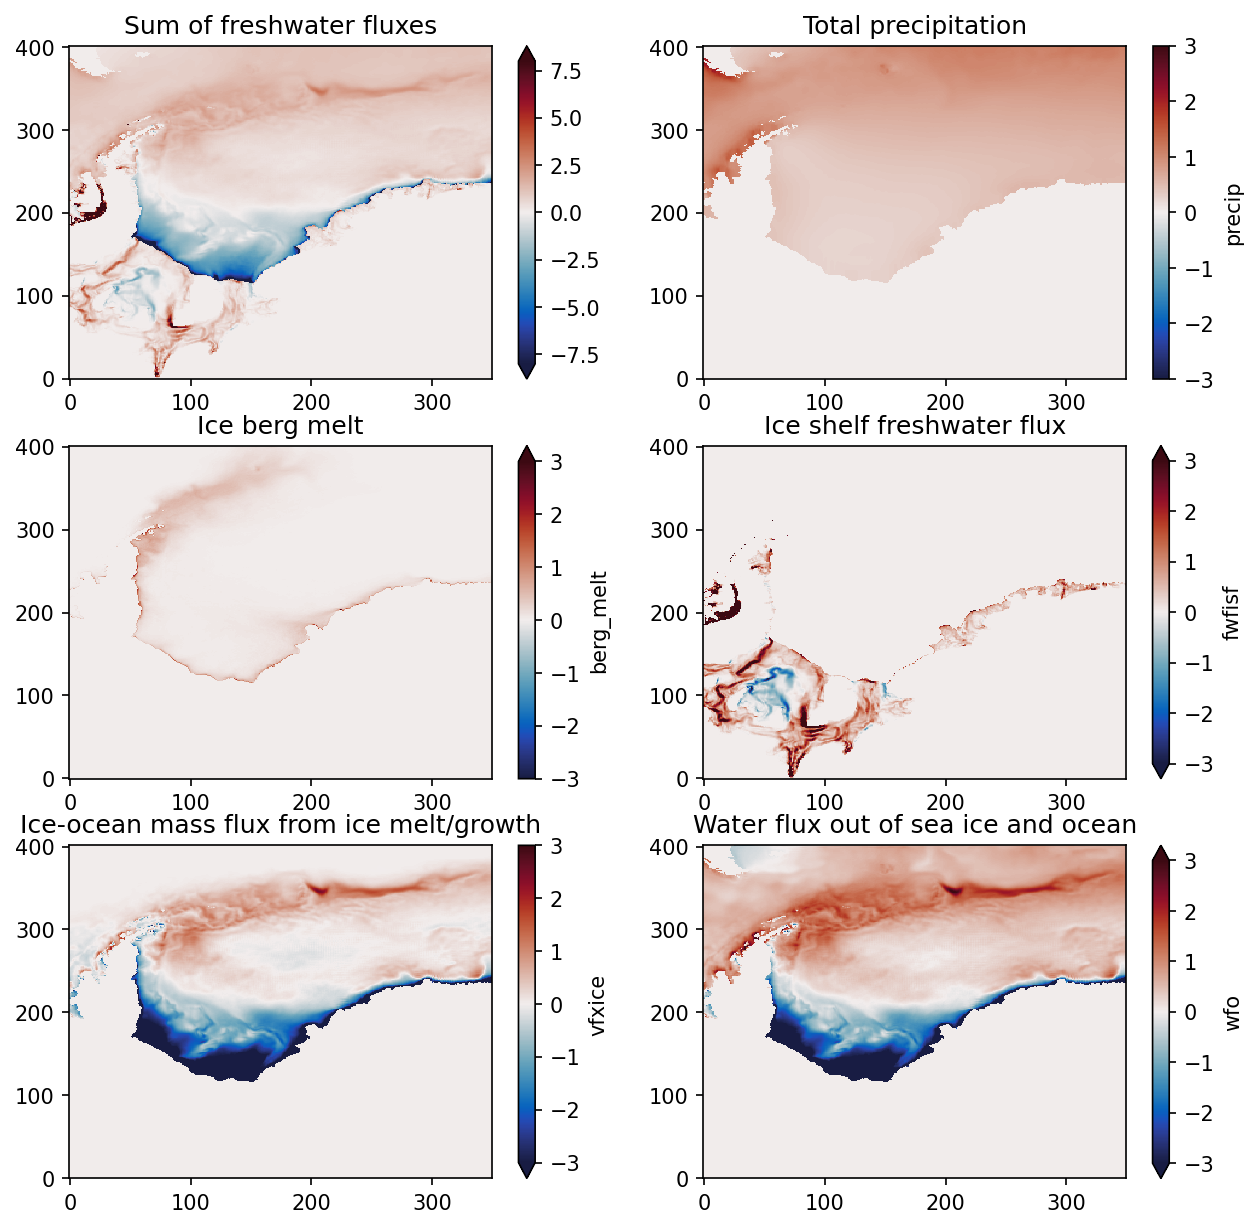

In [70]:
fig, ax = plt.subplots(3,2, figsize=(10, 10), dpi=150)

titles = ['Sum of freshwater fluxes', 'Total precipitation', 'Ice berg melt', 'Ice shelf freshwater flux',
          'Ice-ocean mass flux from ice melt/growth', 'Water flux out of sea ice and ocean']

kwags = {'cmap':cmocean.cm.balance, 'vmin':-3, 'vmax':3}
water_flux_into_ocean.plot(ax=ax[0,0], vmin=-8, vmax=8, cmap=cmocean.cm.balance)
precip.plot(ax=ax[0,1]  , **kwags)
bergmelt.plot(ax=ax[1,0], **kwags)
fwfisf.plot(ax=ax[1,1]  , **kwags)
vfxice.plot(ax=ax[2,0]  , **kwags)
wfo.plot(ax=ax[2,1]     , **kwags)

for a, axis in enumerate(ax.ravel()):
    axis.set_xlabel(''); axis.set_ylabel('');
    axis.set_title(titles[a])

Over the timeseries, see a loss of about 0.02 kg/m2/s of freshwater in the ocean surface from sources. 

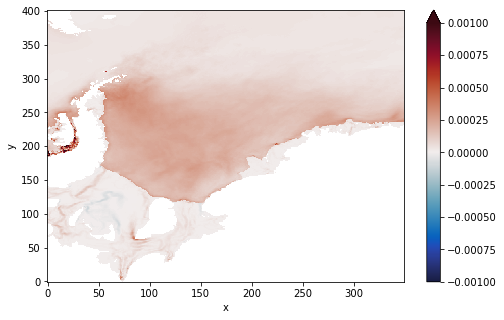

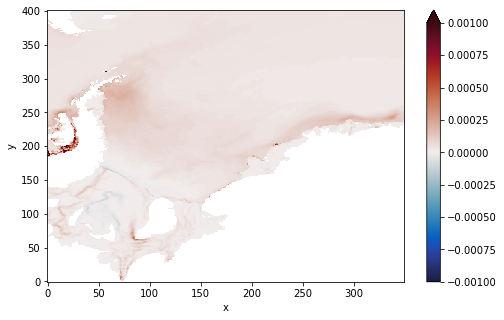

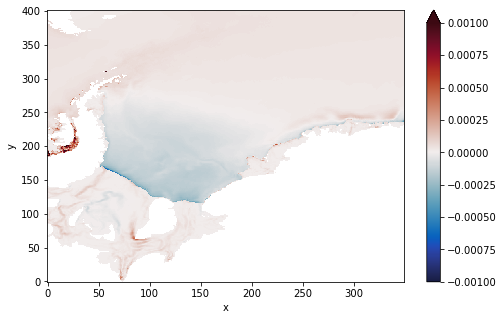

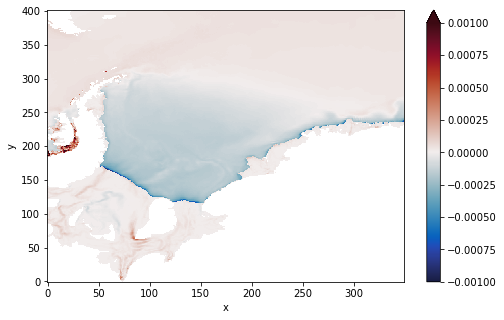

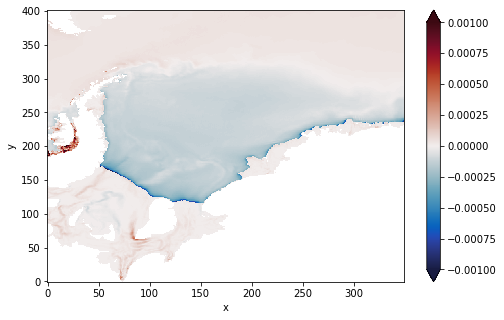

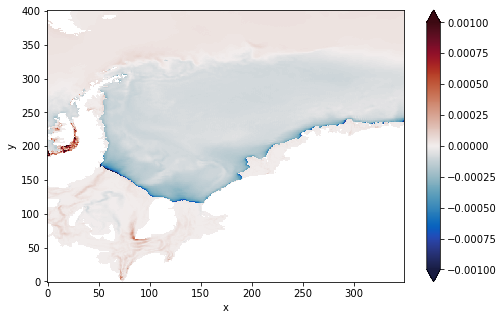

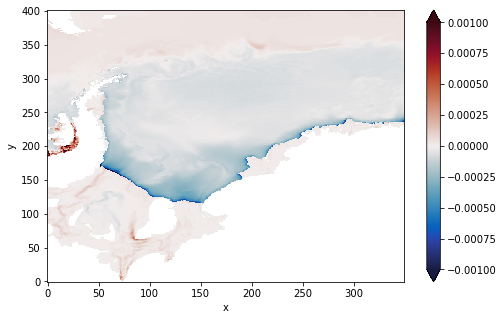

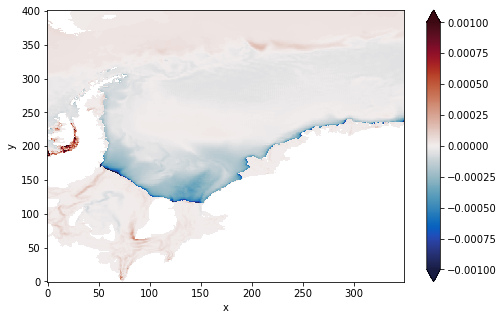

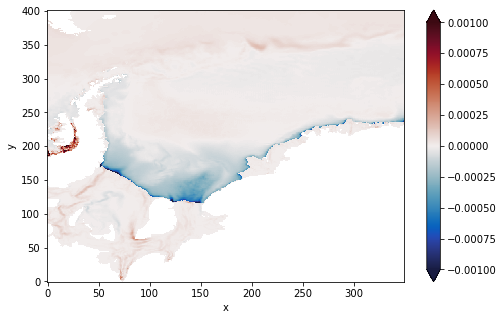

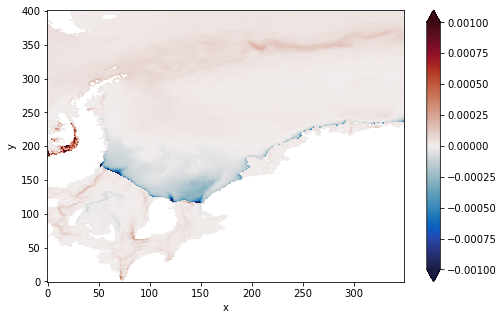

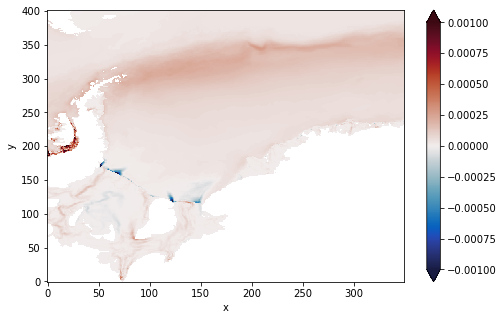

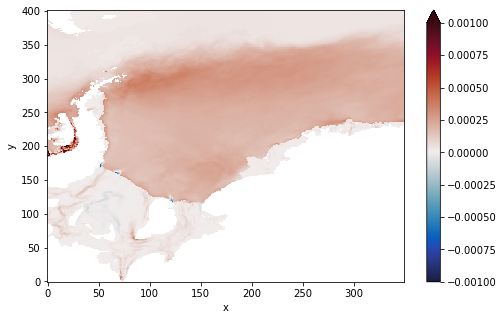

In [30]:
for month in range(1,13):
    fig, ax = plt.subplots(1,1, figsize=(8,5))
    monthly_water_flux = water_flux_into_ocean.isel(time_counter=water_flux_into_ocean.time_counter.dt.month==month).mean(dim='time_counter')
    monthly_water_flux.plot(ax=ax, vmin=-1e-3, vmax=1e-3, cmap=cmocean.cm.balance)

### Also look at surface temperature in the weddell sea region and the seasonal trend over the course of the run
- Seasonal plots
- Trends

In [39]:
surface_temp = ds_T.sosst.isel(time_counter=ds_T.time_counter.dt.month==month, **weddell_overall)
surface_temp['time_counter'] = surface_temp.time_counter.dt.year

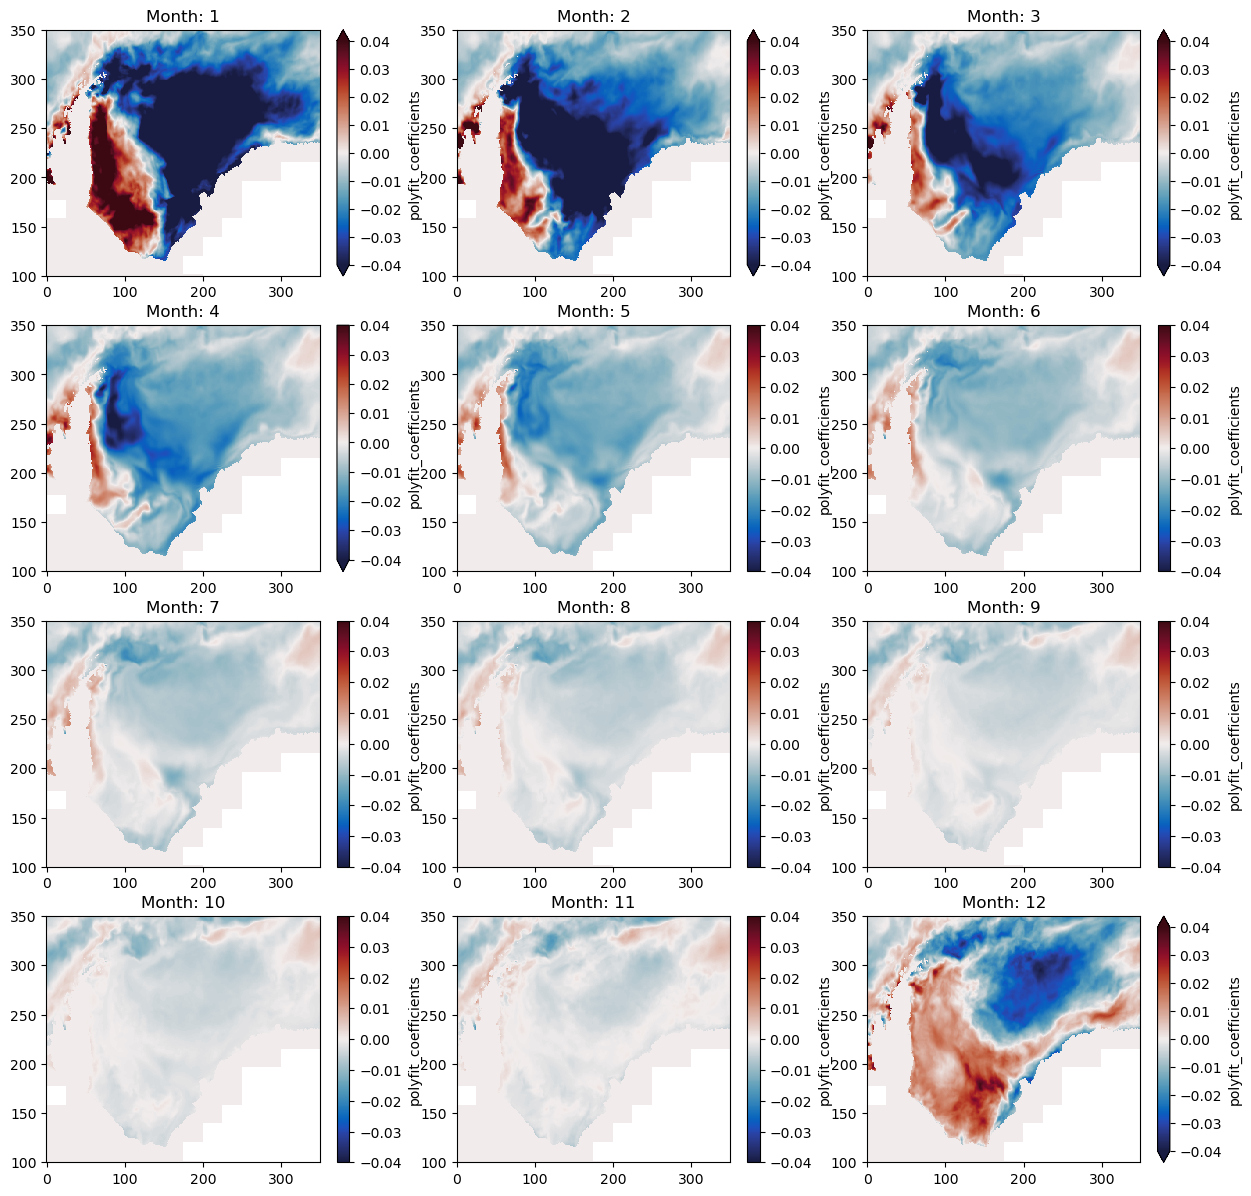

In [24]:
fig, ax = plt.subplots(4,3, figsize=(15,15), dpi=100)
for n, axis in enumerate(ax.ravel()):
    month = n+1
    # T_start = ds_T.sosst.isel(time_counter=ds_T.time_counter.dt.month==month, **weddell_overall).isel(time_counter=0)
    # T_trend = ds_T.sosst.isel(time_counter=ds_T.time_counter.dt.month==month, **weddell_overall) - T_start
        # T_trend.mean(dim='time_counter').plot(ax=axis, vmin=-2, vmax=2, cmap=cmocean.cm.balance)

    surface_temp = ds_T.sosst.isel(time_counter=ds_T.time_counter.dt.month==month, **weddell_overall)
    surface_temp['time_counter'] = (surface_temp.time_counter.dt.year - surface_temp.time_counter.dt.year[0])
    result = surface_temp.polyfit(dim = "time_counter", deg = 1, full=True)
    a = result.polyfit_coefficients.sel(degree=1)
    b = result.polyfit_coefficients.sel(degree=0)
    c = result.polyfit_residuals
    a.plot(ax=axis, vmin=-0.04, vmax=0.04, cmap=cmocean.cm.balance)
    # b.plot(ax=axis, vmin=None, vmax=None, cmap=cmocean.cm.balance)
    # c.plot(ax=axis, vmin=None, vmax=None, cmap=cmocean.cm.balance)
    
    axis.set_xlabel(''); axis.set_ylabel(''); 
    axis.set_ylim(100,350)
    axis.set_title(f'Month: {month}')

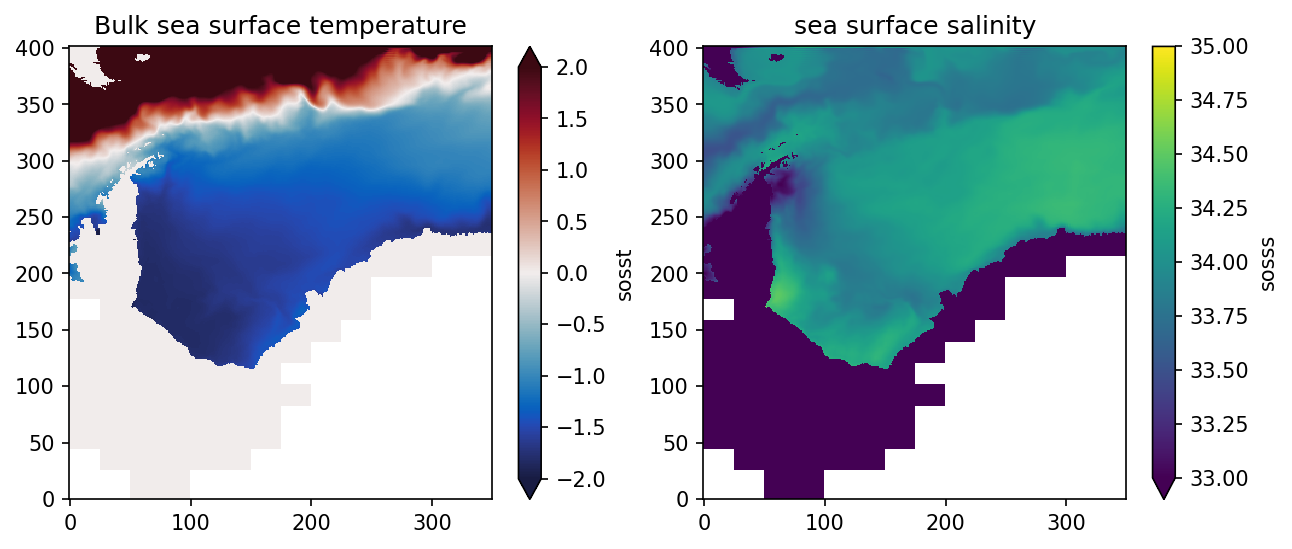

In [47]:
name1 = ds_T.sosst.long_name
name2 = ds_T.sosss.long_name

fig, ax = plt.subplots(1,2, figsize=(10,4), dpi=150)
ds_T.sosst.isel(**weddell_overall).mean(dim='time_counter').plot(ax=ax[0], vmin=-2, vmax=2, cmap=cmocean.cm.balance) 
ds_T.sosss.isel(**weddell_overall).mean(dim='time_counter').plot(ax=ax[1], vmin=33, vmax=35)
title1= ax[0].set_title(name1)
title2= ax[1].set_title(name2)

for axis in ax.ravel():
    axis.set_xlabel(''); axis.set_ylabel('');